## **Author: Asad Tariq Sheikh**

## **Task: Spam Email Classifier**

(Level - Beginners)

Build a machine learning model that can classify emails as either spam or not spam (ham). Use natural language processing (NLP) techniques to process and analyze email text.

This is a Basic NLP Task.

Dataset: https://raw.githubusercontent.com/asadsheikh1/CodeAlpha/main/Emails.csv

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier

In [2]:
# pd.set_option('display.max_rows', None)

# **Importing CSV**

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/asadsheikh1/CodeAlpha/main/Emails.csv')

# **Reading CSV**

In [4]:
data

,CATEGORY,MESSAGE,FILE_NAME
0,1,"Dear Homeowner,\n\n \n\nInterest Rates are at ...",00249.5f45607c1bffe89f60ba1ec9f878039a
1,1,ATTENTION: This is a MUST for ALL Computer Use...,00373.ebe8670ac56b04125c25100a36ab0510
2,1,This is a multi-part message in MIME format.\n...,00214.1367039e50dc6b7adb0f2aa8aba83216
3,1,IMPORTANT INFORMATION:\n\n\n\nThe new domain n...,00210.050ffd105bd4e006771ee63cabc59978
4,1,This is the bottom line. If you can GIVE AWAY...,00033.9babb58d9298daa2963d4f514193d7d6
...,...,...,...
5791,0,"I'm one of the 30,000 but it's not working ver...",00609.dd49926ce94a1ea328cce9b62825bc97
5792,0,Damien Morton quoted:\n\n>W3C approves HTML 4 ...,00957.e0b56b117f3ec5f85e432a9d2a47801f
5793,0,"On Mon, 2002-07-22 at 06:50, che wrote:\n\n\n\...",01127.841233b48eceb74a825417d8d918abf8
5794,0,"Once upon a time, Manfred wrote :\n\n\n\n> I w...",01178.5c977dff972cd6eef64d4173b90307f0


# **Analyzing Data**

In [5]:
data.isnull().sum()

CATEGORY     0
MESSAGE      0
FILE_NAME    0
dtype: int64

In [6]:
data.describe()

,CATEGORY
count,5796.000000
mean,0.327122
std,0.469203
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [7]:
data.nunique()

CATEGORY        2
MESSAGE      5625
FILE_NAME    5796
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5796 entries, 0 to 5795
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   CATEGORY   5796 non-null   int64 
 1   MESSAGE    5796 non-null   object
 2   FILE_NAME  5796 non-null   object
dtypes: int64(1), object(2)
memory usage: 136.0+ KB


# **Downloading `wordnet` and `stopwords`**

In [9]:
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# **Tokenization of Test Message using Regular Expression `nltk.RegexpTokenizer` Tokenizer**

In [10]:
tokenizer = nltk.RegexpTokenizer(r'\w+')
test_message = "Hey,, GGggGG feet it going? <HTML><bads> bads 'randoms' badly"

test_message_tokenized = tokenizer.tokenize(test_message)
test_message_tokenized

['Hey',
 'GGggGG',
 'feet',
 'it',
 'going',
 'HTML',
 'bads',
 'bads',
 'randoms',
 'badly']

In [11]:
test_message_lowercased = [t.lower() for t in test_message_tokenized]

# **Lemmatization of Test Message Tokens using WordNetLemmatizer**

In [12]:
lemmatizer = WordNetLemmatizer()

test_message_lemmatized_tokens = [lemmatizer.lemmatize(t) for t in test_message_lowercased]
test_message_lemmatized_tokens

['hey',
 'gggggg',
 'foot',
 'it',
 'going',
 'html',
 'bad',
 'bad',
 'randoms',
 'badly']

# **List of English Stopwords using NLTK**

In [13]:
stopwords = stopwords.words('english')
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [14]:
test_message_useful_tokens = [t for t in test_message_lemmatized_tokens if t not in stopwords]
test_message_useful_tokens

['hey', 'gggggg', 'foot', 'going', 'html', 'bad', 'bad', 'randoms', 'badly']

##**We can also do it with a method**

In [15]:
def message_to_token_list(s):
    tokens = tokenizer.tokenize(s)
    lowercased_tokens = [t.lower() for t in tokens]
    lemmatized_tokens = [lemmatizer.lemmatize(t) for t in lowercased_tokens]
    useful_tokens = [t for t in lemmatized_tokens if t not in stopwords]

    return useful_tokens

In [16]:
print(message_to_token_list(test_message))

['hey', 'gggggg', 'foot', 'going', 'html', 'bad', 'bad', 'randoms', 'badly']


In [17]:
data = data.sample(frac=1, random_state = 1)
data

,CATEGORY,MESSAGE,FILE_NAME
1655,1,"\n\n<HTML><FONT BACK=""#ffffff"" style=""BACKGRO...",00118.141d803810acd9d4fc23db103dddfcd9
1344,1,"<html><body bgColor=""#CCCCCC"" topmargin=1 onMo...",00463.0bc4e08af0529dd773d9f10f922547db
5678,0,Quoting Paul Linehan (plinehan@yahoo.com):\n\n...,00358.87ee38040ac1f42320c7b89628b1850a
4807,0,<a href=http://www.aaronsw.com/weblog/>\n\nAar...,01274.0d083a2d3b30061efdc2cc73ee9e76e3
5392,0,"Oh yeah, the link for more info:\n\n\n\nhttp:/...",00756.2b2ec73ad20a4e0bdf31632ac019233b
...,...,...,...
905,1,"<html>\n\n\n\n<body>\n\n\n\n<font size=""2"" PTS...",00552.877d8dbff829787aa8349b433a8421f0
5192,0,\n\n\n\nformail did the trick. Thanks to those...,00647.97e77e8264c32c8b05077edc15721ba2
3980,0,URL: http://www.askbjoernhansen.com/archives/2...,02055.80f7eff41824e0337e453a988ceda994
235,1,"<html>\n\n<head>\n\n <meta http-equiv=3D""Con...",00376.f4ed5f002f9b6b320a67f1da9cacbe72


In [18]:
data.reset_index(drop=True)

,CATEGORY,MESSAGE,FILE_NAME
0,1,"\n\n<HTML><FONT BACK=""#ffffff"" style=""BACKGRO...",00118.141d803810acd9d4fc23db103dddfcd9
1,1,"<html><body bgColor=""#CCCCCC"" topmargin=1 onMo...",00463.0bc4e08af0529dd773d9f10f922547db
2,0,Quoting Paul Linehan (plinehan@yahoo.com):\n\n...,00358.87ee38040ac1f42320c7b89628b1850a
3,0,<a href=http://www.aaronsw.com/weblog/>\n\nAar...,01274.0d083a2d3b30061efdc2cc73ee9e76e3
4,0,"Oh yeah, the link for more info:\n\n\n\nhttp:/...",00756.2b2ec73ad20a4e0bdf31632ac019233b
...,...,...,...
5791,1,"<html>\n\n\n\n<body>\n\n\n\n<font size=""2"" PTS...",00552.877d8dbff829787aa8349b433a8421f0
5792,0,\n\n\n\nformail did the trick. Thanks to those...,00647.97e77e8264c32c8b05077edc15721ba2
5793,0,URL: http://www.askbjoernhansen.com/archives/2...,02055.80f7eff41824e0337e453a988ceda994
5794,1,"<html>\n\n<head>\n\n <meta http-equiv=3D""Con...",00376.f4ed5f002f9b6b320a67f1da9cacbe72


In [19]:
split_index = int(len(data) * 0.8)

train_data, test_data = data[:split_index], data[split_index:]

In [20]:
train_data = train_data.reset_index(drop=True)
test_data = test_data.reset_index(drop=True)

In [21]:
train_data

,CATEGORY,MESSAGE,FILE_NAME
0,1,"\n\n<HTML><FONT BACK=""#ffffff"" style=""BACKGRO...",00118.141d803810acd9d4fc23db103dddfcd9
1,1,"<html><body bgColor=""#CCCCCC"" topmargin=1 onMo...",00463.0bc4e08af0529dd773d9f10f922547db
2,0,Quoting Paul Linehan (plinehan@yahoo.com):\n\n...,00358.87ee38040ac1f42320c7b89628b1850a
3,0,<a href=http://www.aaronsw.com/weblog/>\n\nAar...,01274.0d083a2d3b30061efdc2cc73ee9e76e3
4,0,"Oh yeah, the link for more info:\n\n\n\nhttp:/...",00756.2b2ec73ad20a4e0bdf31632ac019233b
...,...,...,...
4631,0,Gregory Alan Bolcer:\n\n>I'm not sure since I ...,00830.3a2cadbd29e654a7cbbf64ba4bdc378d
4632,1,New Account For: zzzz@spamassassin.taint.org\n...,00354.dca4b8984863a76ffd01a33888498288
4633,0,">>>>> ""O"" == Owen Byrne <owen@permafrost.net> ...",00346.f1d941485f6a20b29329111c59760585
4634,0,This is an automated response to a message you...,00033.2ceb520d2c6500ccf24357f2ebdce618


In [22]:
test_data

,CATEGORY,MESSAGE,FILE_NAME
0,0,This is just an semi-educated guess - if I'm w...,01503.5e13994a5676296ed31b14e83367031c
1,1,------=_NextPart_000_00B0_58C75D0E.A4523D08\n\...,00441.3b9c3055e08bda4c0f7eea43749e324c
2,0,I seem to be getting the known spam message nu...,00623.8bf6da05b986d3b16c208102e1c266f2
3,0,"\n\n\n\n>>>>> On Mon, 30 Sep 2002, ""Ted"" == Te...",01143.77077715a838bb473dad6a466d2e2403
4,1,This is a multi-part message in MIME format.\n...,00224.1b3430b101a8a8b22493c4948fcbe9cc
...,...,...,...
1155,1,"<html>\n\n\n\n<body>\n\n\n\n<font size=""2"" PTS...",00552.877d8dbff829787aa8349b433a8421f0
1156,0,\n\n\n\nformail did the trick. Thanks to those...,00647.97e77e8264c32c8b05077edc15721ba2
1157,0,URL: http://www.askbjoernhansen.com/archives/2...,02055.80f7eff41824e0337e453a988ceda994
1158,1,"<html>\n\n<head>\n\n <meta http-equiv=3D""Con...",00376.f4ed5f002f9b6b320a67f1da9cacbe72


# **Token Frequency Counting in Training Data**

In [23]:
token_counter = {}

for message in train_data['MESSAGE']:
    message_as_token_list = message_to_token_list(message)

    for token in message_as_token_list:
        if token in token_counter:
            token_counter[token] += 1
        else:
            token_counter[token] = 1

In [24]:
len(token_counter)

86415

In [25]:
token_counter

{'html': 4175,
 'font': 35005,
 'back': 1055,
 'ffffff': 2535,
 'style': 3349,
 'background': 789,
 'color': 9642,
 'size': 13107,
 '3': 3581,
 'ptsize': 450,
 '12': 985,
 'b': 12856,
 'viagra': 66,
 '000000': 1923,
 '2': 7993,
 '10': 2182,
 'family': 1491,
 'sansserif': 314,
 'face': 9950,
 'arial': 6187,
 'lang': 419,
 '0': 9445,
 'br': 16013,
 'breakthrough': 22,
 'medication': 50,
 'impotence': 13,
 'delivered': 79,
 'mailbox': 71,
 'without': 658,
 'leaving': 50,
 'computer': 640,
 'simply': 377,
 'click': 2144,
 'href': 3875,
 'http': 14926,
 'host': 158,
 '1bulk': 12,
 'email': 4015,
 'software': 1129,
 'com': 11675,
 'ch4': 12,
 'pharm': 12,
 'blue': 181,
 'le': 680,
 '5': 2932,
 'minute': 366,
 'complete': 403,
 'line': 1307,
 'consultation': 68,
 'many': 1004,
 'case': 681,
 '24': 575,
 'nbsp': 9732,
 'hour': 589,
 'gt': 108,
 'website': 488,
 'treatment': 33,
 'compromised': 12,
 'sexual': 120,
 'function': 202,
 'convenient': 36,
 'affordable': 55,
 'confidential': 135,
 's

# **Using a method `keep_token()` to check if `processed_token > threshold`**

In [26]:
def keep_token(processed_token, threshold):
    if processed_token not in token_counter:
        return False
    else:
        return token_counter[processed_token] > threshold


keep_token('random', 20)

True

# **Features**

In [27]:
features = set()

for token in token_counter:
    if keep_token(token, 10000):
        features.add(token)


features

{'3d', 'b', 'br', 'com', 'font', 'http', 'p', 'size', 'td', 'tr'}

In [28]:
features = list(features)
features

['3d', 'td', 'br', 'b', 'font', 'tr', 'p', 'com', 'size', 'http']

# **Mapping token to index**

In [29]:
token_to_index_mapping = {t:i for t, i in zip(features, range(len(features)))}
token_to_index_mapping

{'3d': 0,
 'td': 1,
 'br': 2,
 'b': 3,
 'font': 4,
 'tr': 5,
 'p': 6,
 'com': 7,
 'size': 8,
 'http': 9}

# **Text to Count Vector Conversion Function for NLP**

In [30]:
def message_to_count_vector(message):
    count_vector = np.zeros(len(features))
    processed_list_of_tokens = message_to_token_list(message)

    for token in processed_list_of_tokens:
        if token not in features:
            continue
        index = token_to_index_mapping[token]
        count_vector[index] += 1

    return count_vector

In [31]:
message_to_count_vector(message)

array([0., 0., 0., 0., 0., 0., 1., 4., 0., 3.])

In [32]:
message_to_count_vector(train_data['MESSAGE'].iloc[2])

array([0., 0., 0., 0., 0., 0., 1., 1., 0., 1.])

In [33]:
train_data.iloc[2]

CATEGORY                                                     0
MESSAGE      Quoting Paul Linehan (plinehan@yahoo.com):\n\n...
FILE_NAME               00358.87ee38040ac1f42320c7b89628b1850a
Name: 2, dtype: object

# **Train, Test, Split**

In [34]:
def df_to_X_y(dff):
  y = dff['CATEGORY'].to_numpy().astype(int)

  message_col = dff['MESSAGE']
  count_vectors = []

  for message in message_col:
    count_vector = message_to_count_vector(message)
    count_vectors.append(count_vector)

  X = np.array(count_vectors).astype(int)

  return X, y

In [35]:
X_train, y_train = df_to_X_y(train_data)
X_test, y_test = df_to_X_y(test_data)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4636, 10), (4636,), (1160, 10), (1160,))

# **Using `MinMaxScaler`**

In [36]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train, X_test = scaler.transform(X_train), scaler.transform(X_test)
X_train

array([[0.        , 0.        , 0.04064039, ..., 0.04265403, 0.00732601,
        0.025     ],
       [0.        , 0.01346801, 0.0270936 , ..., 0.00947867, 0.02564103,
        0.00833333],
       [0.        , 0.        , 0.        , ..., 0.00473934, 0.        ,
        0.00416667],
       ...,
       [0.        , 0.        , 0.        , ..., 0.00947867, 0.        ,
        0.00416667],
       [0.        , 0.        , 0.        , ..., 0.00947867, 0.        ,
        0.00416667],
       [0.        , 0.        , 0.        , ..., 0.01895735, 0.        ,
        0.0125    ]])

# **Algorithms**

# **Logistic Regression**

In [37]:
log_reg = LogisticRegression()
log_reg

LogisticRegression()

In [38]:
log_reg.fit(X_train, y_train)

LogisticRegression()

# **Prediction**

In [39]:
y_pred = log_reg.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 1, 0])

# **Metrics**

In [40]:
conf_matrix = confusion_matrix(y_pred, y_test)
conf_matrix

array([[787, 253],
       [  1, 119]])

<Axes: >

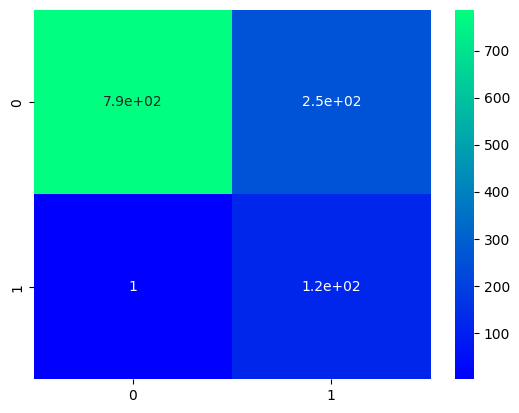

In [41]:
sns.heatmap(conf_matrix, annot=True, cmap='winter')

In [42]:
accuracy = (conf_matrix.diagonal().sum()) / (conf_matrix.sum())
print(f'Accuracy: {accuracy}')

Accuracy: 0.7810344827586206


In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      1.00      0.86       788
           1       0.99      0.32      0.48       372

    accuracy                           0.78      1160
   macro avg       0.87      0.66      0.67      1160
weighted avg       0.83      0.78      0.74      1160



# **Random Forest Classifier**

In [44]:
random_forest_classifier = RandomForestClassifier()
random_forest_classifier

RandomForestClassifier()

In [45]:
random_forest_classifier.fit(X_train, y_train)

RandomForestClassifier()

# **Prediction**

In [46]:
y_pred = random_forest_classifier.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 1, 0])

# **Metrics**

In [47]:
conf_matrix = confusion_matrix(y_pred, y_test)
conf_matrix

array([[765, 158],
       [ 23, 214]])

<Axes: >

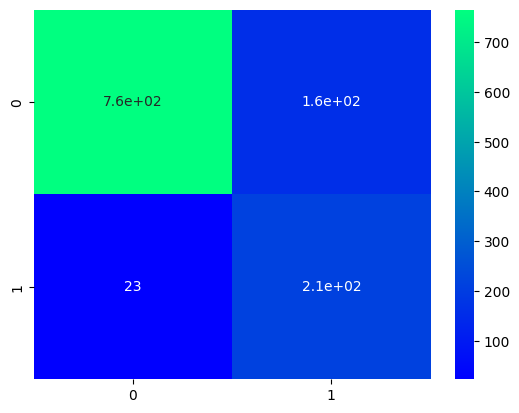

In [48]:
sns.heatmap(conf_matrix, annot=True, cmap='winter')

In [49]:
accuracy = (conf_matrix.diagonal().sum()) / (conf_matrix.sum())
print(f'Accuracy: {accuracy}')

Accuracy: 0.8439655172413794


In [50]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.97      0.89       788
           1       0.90      0.58      0.70       372

    accuracy                           0.84      1160
   macro avg       0.87      0.77      0.80      1160
weighted avg       0.85      0.84      0.83      1160

